In [2]:
# Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.


# Importing required libraries
import pandas as pd

# Reading the dataset
df = pd.read_csv("BIKE DETAILS.csv")   # or the correct filename after download

# Display first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Display shape (rows, columns)
print("\nShape of the dataset:")
print(df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())


First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN 

In [4]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check percentage of missing values
print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

# Handle missing values using dictionary-based fillna
# - Numerical columns → filled with median
# - Categorical columns → filled with mode
df.fillna({
    'ex_showroom_price': df['ex_showroom_price'].median(),
    'km_driven': df['km_driven'].median(),
    'seller_type': df['seller_type'].mode()[0],
    'owner': df['owner'].mode()[0]
}, inplace=True)

# Verify after filling
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values in each column:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

Percentage of missing values:
name                 0.0
selling_price        0.0
year                 0.0
seller_type          0.0
owner                0.0
km_driven            0.0
ex_showroom_price    0.0
dtype: float64

Missing values after handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


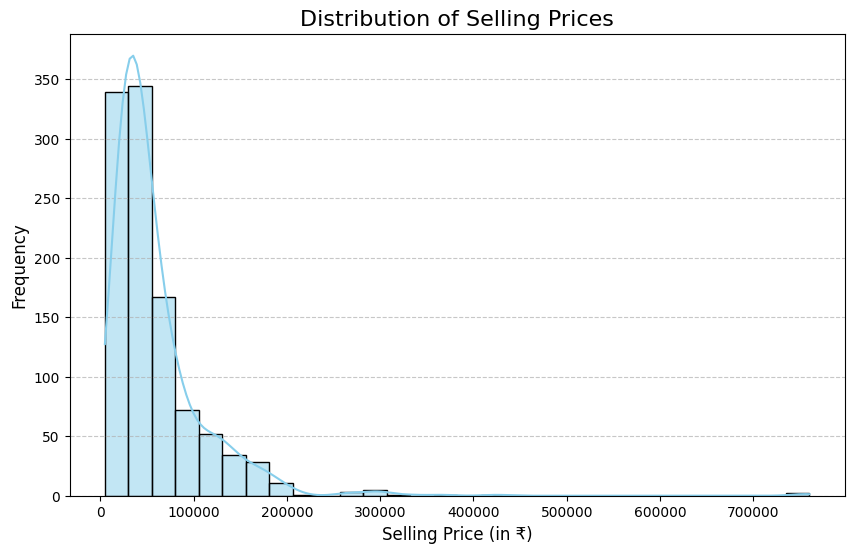

In [5]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Selling Prices', fontsize=16)
plt.xlabel('Selling Price (in ₹)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


/tmp/ipython-input-2745925782.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller, palette='viridis')


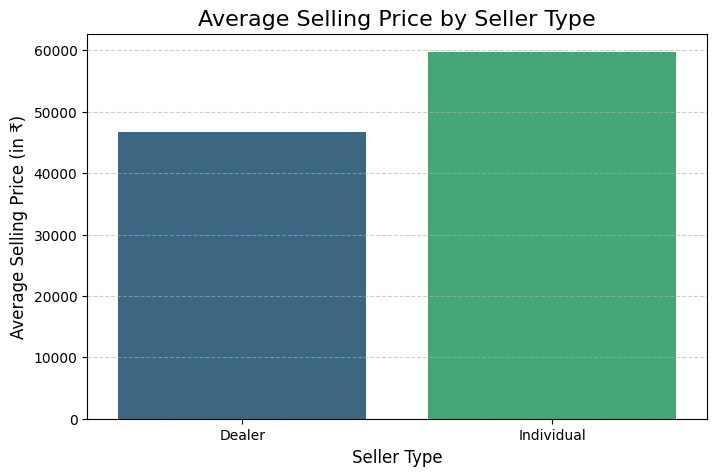

  seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59711.923223


In [6]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average selling price by seller_type
avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller, palette='viridis')

# Add title and labels
plt.title('Average Selling Price by Seller Type', fontsize=16)
plt.xlabel('Seller Type', fontsize=12)
plt.ylabel('Average Selling Price (in ₹)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Display data table for reference
print(avg_price_by_seller)


/tmp/ipython-input-132014234.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette='coolwarm')


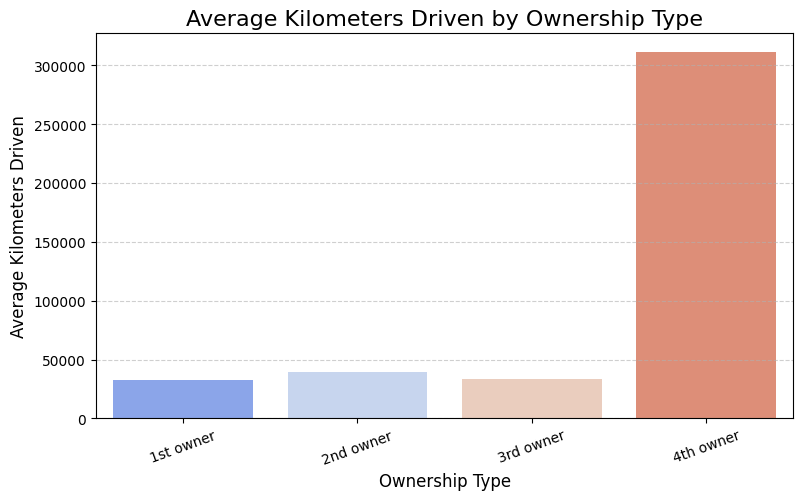

       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


In [7]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average km_driven by ownership type
avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(9, 5))
sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette='coolwarm')

# Add title and labels
plt.title('Average Kilometers Driven by Ownership Type', fontsize=16)
plt.xlabel('Ownership Type', fontsize=12)
plt.ylabel('Average Kilometers Driven', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Display computed data
print(avg_km_by_owner)


In [9]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics

import pandas as pd

# Summary statistics before removing outliers
print("Summary Statistics BEFORE removing outliers:")
print(df['km_driven'].describe())

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nIQR =", IQR)
print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

# Filter data (remove outliers)
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nSummary Statistics AFTER removing outliers:")
print(df_no_outliers['km_driven'].describe())

# Display number of records removed
print(f"\nNumber of rows before: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")
print(f"Total outliers removed: {len(df) - len(df_no_outliers)}")


Summary Statistics BEFORE removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

IQR = 29500.0
Lower Bound = -30750.0
Upper Bound = 87250.0

Summary Statistics AFTER removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Number of rows before: 1061
Number of rows after removing outliers: 1022
Total outliers removed: 39


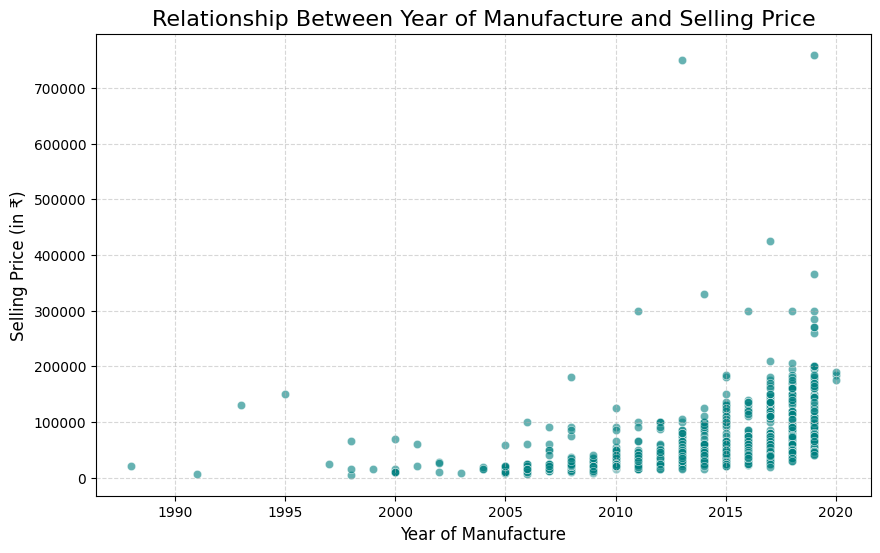

In [10]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price

import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df_no_outliers, alpha=0.6, color='teal')

# Add title and labels
plt.title("Relationship Between Year of Manufacture and Selling Price", fontsize=16)
plt.xlabel("Year of Manufacture", fontsize=12)
plt.ylabel("Selling Price (in ₹)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [11]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

import pandas as pd

# Perform one-hot encoding on 'seller_type' column
df_encoded = pd.get_dummies(df_no_outliers, columns=['seller_type'], drop_first=False)

# Display first 5 rows of the new DataFrame
print("DataFrame after One-Hot Encoding (first 5 rows):")
print(df_encoded.head())


DataFrame after One-Hot Encoding (first 5 rows):
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350            72752.5               False                    True  
1       5650            72752.5               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000            72752.5               False                    True  


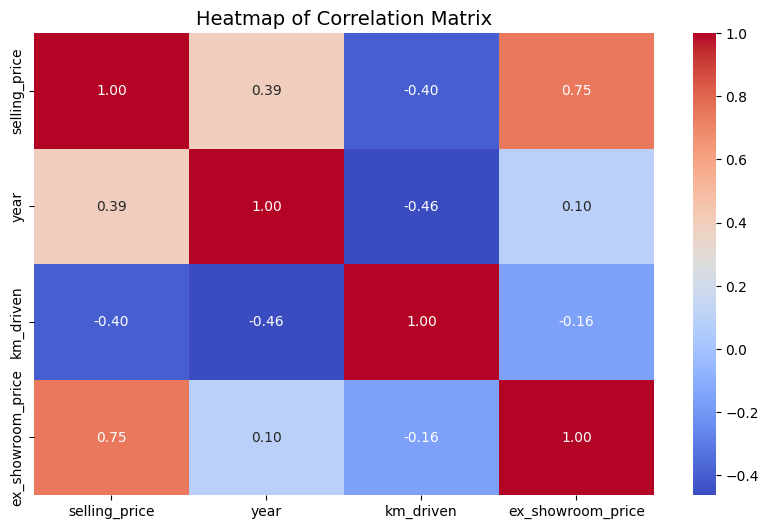

In [13]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix', fontsize=14)
plt.show()



**Question 10: Summarize your findings in a brief report:**

**1. What are the most important factors affecting a bike's selling price?**
**2. Mention any data cleaning or feature engineering you performed.**

*Answer:*

**1. Most Important Factors Affecting Selling Price:**

* **Year:** Newer bikes tend to have **higher selling prices**. As the manufacturing year increases, resale value increases.
* **Ex-Showroom Price:** There is a **strong positive correlation** between the original showroom price and the resale (selling) price — expensive bikes hold more value over time.
* **Kilometers Driven (km_driven):** A **negative correlation** was observed — bikes that have been driven more tend to sell for less.
* **Seller Type:** Dealers generally sell bikes at **higher average prices** compared to individuals or trustmark dealers.
* **Ownership:** Bikes owned by the **first owner** usually have higher prices than those with multiple owners.



**2. Data Cleaning and Feature Engineering Performed:**

* **Handled Missing Values:**
  Filled missing values in the 'ex_showroom_price' column using the **median** (since the column had ~41% missing values).
* **Outlier Removal:**
  Applied the **Interquartile Range (IQR)** method on the 'km_driven' column to detect and remove extreme outliers.
* **Encoding Categorical Data:**
  Converted categorical variables like 'seller_type' into numeric format using **One-Hot Encoding** to prepare data for analysis.
* **Visualization and Trend Analysis:**
  Used **histograms, bar plots, scatter plots, and heatmaps** to visualize distributions, averages, and correlations.
* **Final Dataset:**
  A cleaned, numeric, and analysis-ready dataset with no missing values or extreme outliers.


